
AF7: Redes Neuronales Artificiales

*   Jonathan Gael Posada Licón
*   Juan Emiliano Morales Silva
*   Rene Gutierrez Valdez
*   Guillermo Rodríguez González
*   Andres Suárez Galván











In [5]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.19.0


In [9]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

In [11]:
train_images.shape

(60000, 28, 28)

In [12]:
len(train_labels)

60000

In [13]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [14]:
test_images.shape

(10000, 28, 28)

In [15]:
len(test_labels)

10000

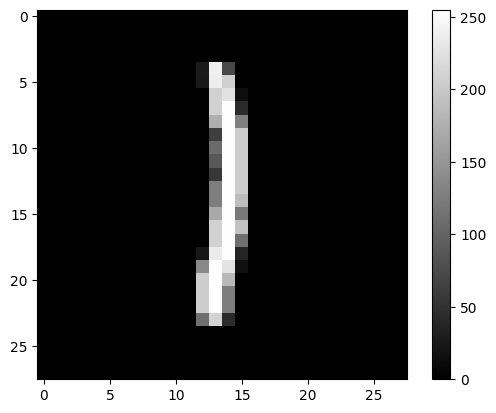

In [23]:
plt.figure()
plt.imshow(train_images[72], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [24]:
train_images = train_images / 255.0

test_images = test_images / 255.0

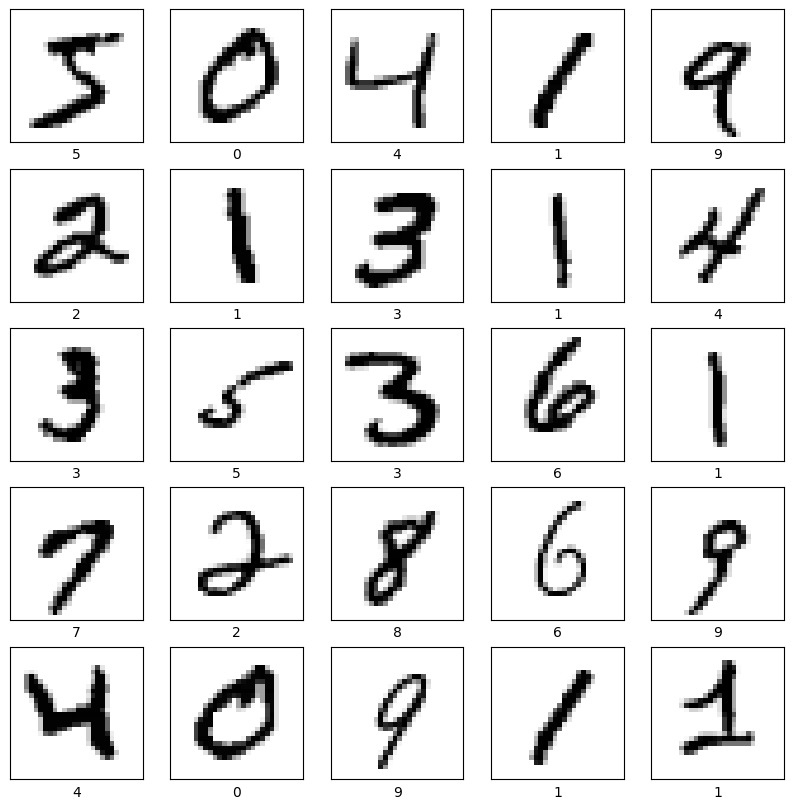

In [25]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8838 - loss: 0.4200
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9666 - loss: 0.1164
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9773 - loss: 0.0770
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9835 - loss: 0.0558
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9877 - loss: 0.0403
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9894 - loss: 0.0342
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9923 - loss: 0.0270
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9948 - loss: 0.0185
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9948 - loss: 0.0168
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9958 - loss: 0.0144


In [29]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.9779 - loss: 0.0814

Test accuracy: 0.9779000282287598


In [30]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [31]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [32]:
predictions[0]

array([2.9421157e-08, 1.5679562e-11, 4.8830447e-07, 1.3204770e-04,
       1.9857828e-15, 3.4512032e-11, 9.9507364e-15, 9.9986744e-01,
       1.8659174e-09, 7.0002768e-09], dtype=float32)

In [44]:
predictions[132]

array([2.20278481e-19, 2.19938034e-15, 2.80043746e-15, 1.75722982e-06,
       2.30262297e-27, 9.99998152e-01, 1.07235564e-13, 1.27717515e-21,
       5.41834210e-13, 6.44770948e-09], dtype=float32)

In [45]:
predictions[10]

array([9.99999940e-01, 6.76923278e-15, 1.28335165e-08, 8.90349860e-13,
       2.67776572e-20, 2.49720158e-11, 2.08054601e-10, 1.23470387e-10,
       7.23307861e-14, 1.06337950e-09], dtype=float32)

In [46]:
predictions[777]

array([5.4713867e-13, 9.9970019e-01, 5.1293807e-07, 2.0743551e-07,
       2.7941988e-04, 7.4561702e-12, 6.8620623e-11, 2.7584947e-06,
       1.6817765e-05, 5.6593663e-08], dtype=float32)

In [47]:
predictions[560]

array([1.8710223e-08, 2.6243265e-07, 2.8769437e-06, 5.7335460e-06,
       2.7001114e-04, 1.7107412e-09, 3.7283709e-10, 6.6865596e-04,
       6.1210926e-07, 9.9905187e-01], dtype=float32)

In [48]:
np.argmax(predictions[0])

np.int64(7)

In [34]:
test_labels[0]

np.uint8(7)

In [35]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

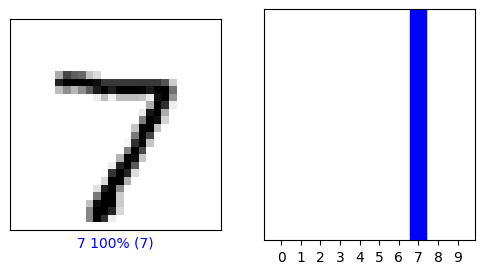

In [36]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

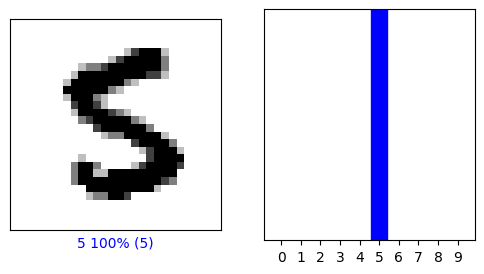

In [49]:
i = 132
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

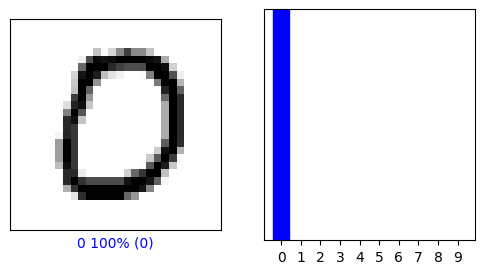

In [50]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

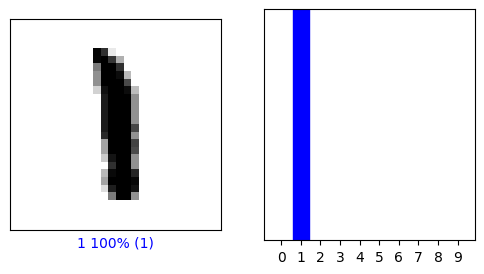

In [51]:
i = 777
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

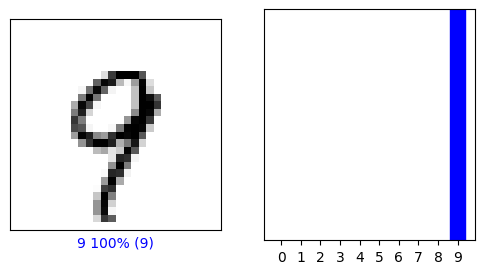

In [52]:
i = 560
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

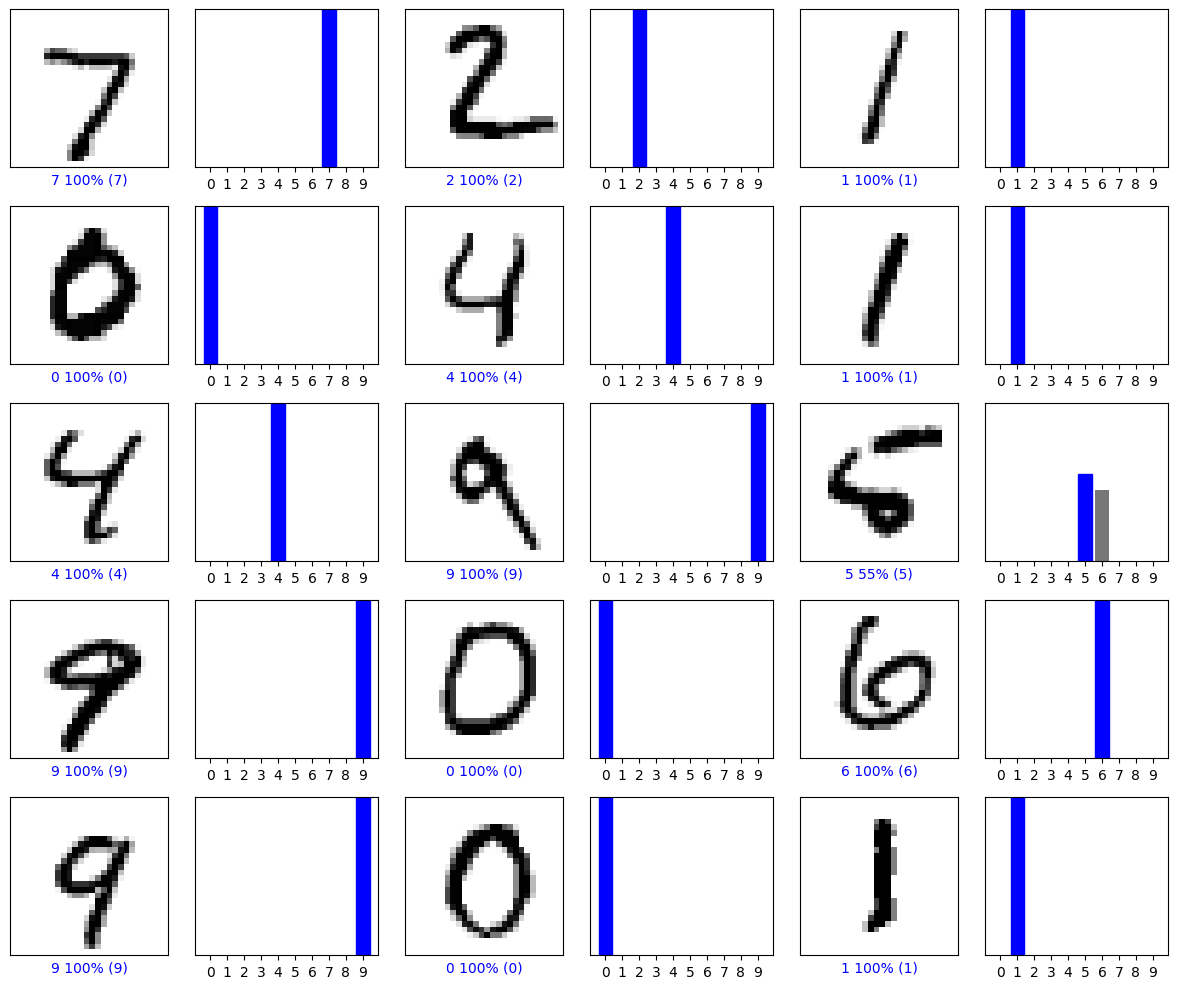

In [53]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [39]:
img = test_images[1]

print(img.shape)

(28, 28)


In [57]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 1, 28, 28)


In [56]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[1.23334069e-11 2.50959520e-09 1.00000000e+00 1.17227716e-09
  6.28465318e-25 1.08190575e-11 1.15856326e-11 1.71523926e-19
  2.08605341e-10 1.50784448e-18]]


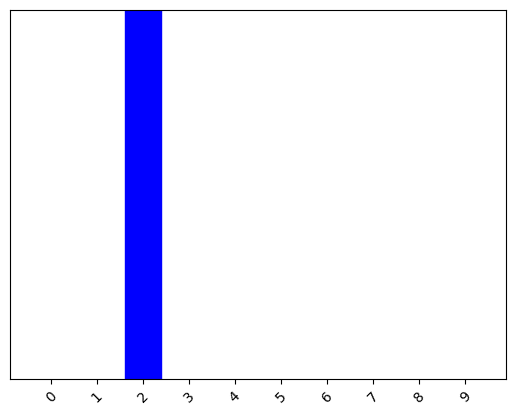

In [55]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [54]:
np.argmax(predictions_single[0])

np.int64(2)